In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000, size =1500)
lngs = np.random.uniform(low=-180.000,high=180.00, size =1500)
lat_lngs = zip(lats,lngs)
lat_lngs

The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-82.9229785758037, 104.17365816641478),
 (82.86229815239119, -74.57033784413187),
 (-61.96812708640487, 52.60112861432691),
 (-44.69488752268226, -71.87909303241776),
 (-28.900867172605267, -58.79205772852795),
 (40.59434271829369, 175.3138020793757),
 (-68.51805597515926, 146.27820214764893),
 (-88.47874168135901, -39.25436816922962),
 (-87.09131627059126, 45.382345363377084),
 (-17.13582392109275, -57.3888887035461),
 (-30.620416255488017, -175.10719914067408),
 (52.92855638430623, -32.697725217251104),
 (-64.81486320458188, 78.62645293613912),
 (-79.7720709196738, -20.812862565217785),
 (42.749184764308126, 118.81047155584793),
 (-61.7644763428497, -81.06832267143596),
 (-0.9513394431882745, -3.8187337726102726),
 (-49.096159653550615, 93.67417964241741),
 (-64.53062653519471, -88.43122514293597),
 (70.93464499934578, -168.43517261428312),
 (56.54064036153645, 21.127853806011927),
 (5.7666489704963055, 114.06912011516891),
 (70.82434948180054, -71.29665933722026),
 (-42.5282494699

You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print(cities)
len(cities)

['albany', 'qaanaaq', 'tsihombe', 'coihaique', 'goya', 'nikolskoye', 'hobart', 'ushuaia', 'port alfred', 'puerto quijarro', 'vaini', 'tasiilaq', 'busselton', 'chifeng', 'punta arenas', 'axim', 'lavrentiya', 'grobina', 'labuan', 'clyde river', 'jamestown', 'samusu', 'upernavik', 'alta floresta', 'butaritari', 'lolua', 'mataura', 'saint-philippe', 'victoria', 'rikitea', 'thompson', 'shenjiamen', 'tuggurt', 'provideniya', 'tyukhtet', 'belmonte', 'bluff', 'barrow', 'ahlat', 'san rafael del sur', 'kizu', 'beloha', 'zlatoustovsk', 'beringovskiy', 'ilulissat', 'temaraia', 'suluova', 'avarua', 'hamilton', 'atuona', 'hermanus', 'rongcheng', 'richards bay', 'leshukonskoye', 'hami', 'maple creek', 'dikson', 'calvinia', 'sola', 'dukat', 'izumo', 'bathsheba', 'castro', 'bengkulu', 'yellowknife', 'barcelona', 'cherskiy', 'faanui', 'tuktoyaktuk', 'severo-kurilsk', 'usinsk', 'areni', 'valjala', 'taolanaro', 'pasighat', 'saint george', 'calatayud', 'sao joao da barra', 'hithadhoo', 'beidaud', 'santiago

615

# Get the City Weather Data


## Import Dependencies, and Initialize an Empty List and Counters

In [5]:
import requests
# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
# use the enumerate() method to get the index of the city for logging purposes and the city for creating an endpoint URL
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 1 | coihaique
Processing Record 5 of Set 1 | goya
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | puerto quijarro
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | chifeng
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | axim
Processing Record 17 of Set 1 | lavrentiya
Processing Record 18 of Set 1 | grobina
Processing Record 19 of Set 1 | labuan
Processing Record 20 of Set 1 | clyde river
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | samusu
City not found. Sk

Processing Record 38 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 39 of Set 4 | vila velha
Processing Record 40 of Set 4 | saint-francois
Processing Record 41 of Set 4 | barra do garcas
Processing Record 42 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 43 of Set 4 | san quintin
Processing Record 44 of Set 4 | nicoya
Processing Record 45 of Set 4 | chokurdakh
Processing Record 46 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 47 of Set 4 | rognan
Processing Record 48 of Set 4 | klaksvik
Processing Record 49 of Set 4 | huntingdon
Processing Record 50 of Set 4 | puerto ayora
Processing Record 1 of Set 5 | plettenberg bay
Processing Record 2 of Set 5 | tecolutla
Processing Record 3 of Set 5 | dunedin
Processing Record 4 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 5 of Set 5 | fez
Processing Record 6 of Set 5 | la ronge
Processing Record 7 of Set 5 | springbok
Processing Record 8 of Set 5 | shin

Processing Record 26 of Set 8 | monrovia
Processing Record 27 of Set 8 | senador jose porfirio
Processing Record 28 of Set 8 | sungaipenuh
Processing Record 29 of Set 8 | nurlat
Processing Record 30 of Set 8 | antofagasta
Processing Record 31 of Set 8 | sayansk
Processing Record 32 of Set 8 | erzurum
Processing Record 33 of Set 8 | marsala
Processing Record 34 of Set 8 | gua musang
Processing Record 35 of Set 8 | coquimbo
Processing Record 36 of Set 8 | segou
Processing Record 37 of Set 8 | rio gallegos
Processing Record 38 of Set 8 | haines junction
Processing Record 39 of Set 8 | kruisfontein
Processing Record 40 of Set 8 | aosta
Processing Record 41 of Set 8 | sfantu gheorghe
Processing Record 42 of Set 8 | high level
Processing Record 43 of Set 8 | constitucion
Processing Record 44 of Set 8 | gayny
Processing Record 45 of Set 8 | plaster rock
Processing Record 46 of Set 8 | iqaluit
Processing Record 47 of Set 8 | aguimes
Processing Record 48 of Set 8 | winneba
Processing Record 49 

Processing Record 14 of Set 12 | puerto el triunfo
Processing Record 15 of Set 12 | drayton valley
Processing Record 16 of Set 12 | siena
Processing Record 17 of Set 12 | salaverry
Processing Record 18 of Set 12 | san jose
Processing Record 19 of Set 12 | walvis bay
Processing Record 20 of Set 12 | gumdag
Processing Record 21 of Set 12 | eufaula
Processing Record 22 of Set 12 | trinidad
Processing Record 23 of Set 12 | traralgon
Processing Record 24 of Set 12 | koumac
Processing Record 25 of Set 12 | half moon bay
Processing Record 26 of Set 12 | taloqan
Processing Record 27 of Set 12 | tono
Processing Record 28 of Set 12 | kaduqli
Processing Record 29 of Set 12 | ternate
Processing Record 30 of Set 12 | meadow lake
Processing Record 31 of Set 12 | ravar
Processing Record 32 of Set 12 | coos bay
Processing Record 33 of Set 12 | batemans bay
Processing Record 34 of Set 12 | intipuca
Processing Record 35 of Set 12 | ucluelet
Processing Record 36 of Set 12 | sar-e pul
Processing Record 37

# Create a DataFrame of the City Weather Data from the API get request

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,48.99,58,95,3.00,US,2020-11-28 18:14:45
1,Qaanaaq,77.48,-69.36,1.33,84,100,6.87,GL,2020-11-28 18:14:45
2,Coihaique,-45.58,-72.07,50.00,53,75,5.82,CL,2020-11-28 18:14:46
3,Goya,-29.14,-59.26,85.78,75,85,5.84,AR,2020-11-28 18:10:16
4,Nikolskoye,59.70,30.79,32.00,94,90,11.18,RU,2020-11-28 18:14:46
5,Hobart,-42.88,147.33,57.99,71,90,9.17,AU,2020-11-28 18:13:06
6,Ushuaia,-54.80,-68.30,44.60,65,75,4.70,AR,2020-11-28 18:11:09
7,Port Alfred,-33.59,26.89,66.88,80,70,10.87,ZA,2020-11-28 18:14:46
8,Puerto Quijarro,-17.78,-57.77,97.16,31,52,2.68,BO,2020-11-28 18:14:46
9,Vaini,-21.20,-175.20,73.40,100,40,4.70,TO,2020-11-28 18:14:38


## Reorder columns in a DataFrame 

In [10]:
# change column order as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df_reorder = city_data_df[new_column_order]

In [11]:
city_data_df_reorder

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-11-28 18:14:45,42.60,-73.97,48.99,58,95,3.00
1,Qaanaaq,GL,2020-11-28 18:14:45,77.48,-69.36,1.33,84,100,6.87
2,Coihaique,CL,2020-11-28 18:14:46,-45.58,-72.07,50.00,53,75,5.82
3,Goya,AR,2020-11-28 18:10:16,-29.14,-59.26,85.78,75,85,5.84
4,Nikolskoye,RU,2020-11-28 18:14:46,59.70,30.79,32.00,94,90,11.18
...,...,...,...,...,...,...,...,...,...
559,Ridgecrest,US,2020-11-28 18:16:21,35.62,-117.67,52.00,32,0,1.61
560,Wolgast,DE,2020-11-28 18:16:32,54.05,13.77,39.99,90,100,6.67
561,Ballymena,GB,2020-11-28 18:16:32,54.86,-6.28,46.99,87,90,4.70
562,Amasia,TR,2020-11-28 18:11:43,40.65,35.83,33.80,59,0,5.82


In [12]:
# reorder looks good, change the original dataframe
city_data_df= city_data_df_reorder

## Output Dataframe to CSV

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")
# The last line in the code block will export the DataFrame to a CSV file, with the index label (or column A) header as "City_ID." 
# If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame


# Get Data for Plotting

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Create Scatterplot with Current Time in the Heading

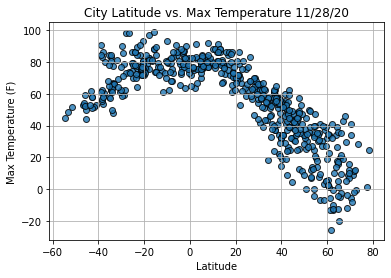

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

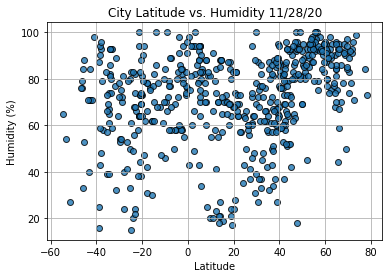

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

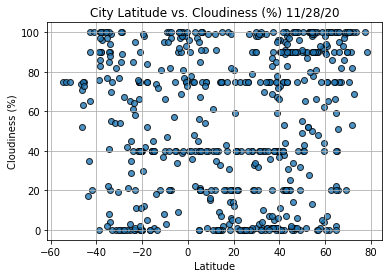

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

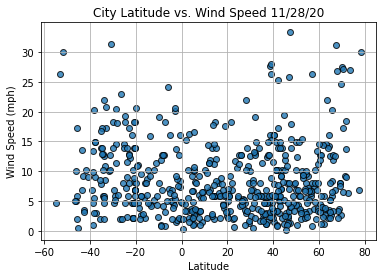

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()